
```sh
# cityscapes epoch 20000
# 2975: 68.03 (epoch: 20,) / 69.12 (epoch: 30,)
# 2000: 56.68 (epoch: 20,)
# 1000: 58.87 (epoch: 20,)
# 500: 55.35 (epoch: 20,)
# 100: 40.5 (epoch: 20,) / 41.63 (epoch: 40,)
```

```sh
# 제안 모델
# 2975: 48.39 (epoch: 20,) / 56.39 (epoch 40,)
# 1000: 48.1 (epoch 20,) / 51.92 (epoch 40,)
# 500: 49.82 (epoch 20,) / 52.78 (epoch 40,)
# 100: 45.97 (epoch 20,) / 49.19 (epoch 40,)
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

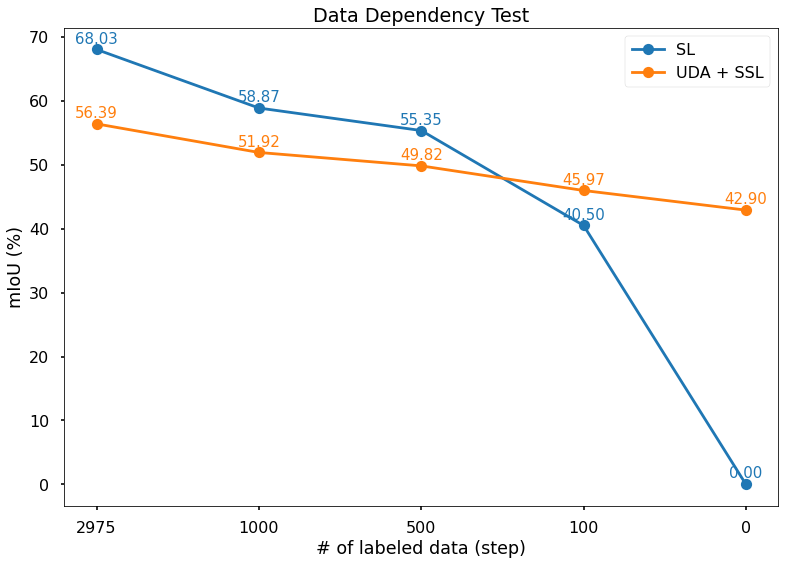

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = ['2975', '1000', '500', '100', '0']
y1 = np.array([68.03, 58.87, 55.35, 40.50, 0.0])
y2 = np.array([56.39, 51.92, 49.82, 45.97, 42.90])

ax.plot(x, y1, label=('SL'), color='C0', marker='o', linestyle='solid')
ax.plot(x, y2, label=('UDA + SSL'),color='C1', marker='o', linestyle='solid')

for i, v in enumerate(y1):
    # ax.text(i+1, v, "%.2f" % v, ha="center", va="center", fontsize=10, backgroundcolor='C0', color='white')
    ax.text(i, v+1.7, "%.2f" % v, ha="center", va="center", fontsize=15, color='C0')

for i, v in enumerate(y2):
    ax.text(i, v+1.7, "%.2f" % v, ha="center", va="center", fontsize=15, color='C1')

# ax.set_xlim(ax.get_xlim()[::-1])

plt.title('Data Dependency Test')
plt.xlabel('# of labeled data (step)')
plt.ylabel('mIoU (%)')
plt.legend()

plt.show()

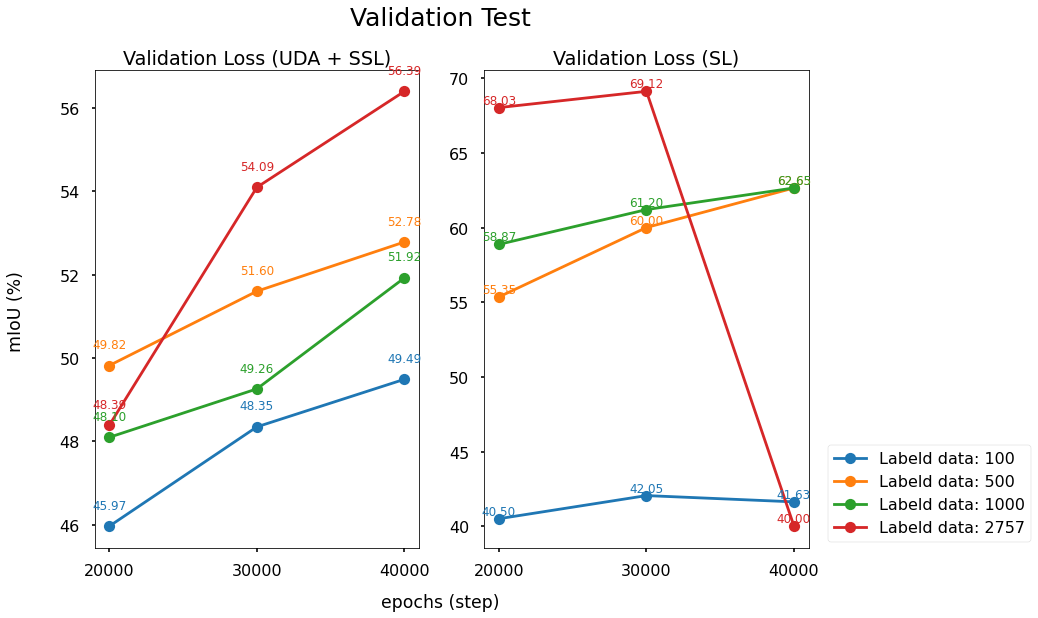

In [148]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# UDA + SSL
x = ['20000', '30000', '40000']
m100 = [45.97, 48.35, 49.49]
m500 = [49.82, 51.60, 52.78]
m1000 = [48.10, 49.26, 51.92]
m2757 = [48.39, 54.09, 56.39]

ax1.plot(x, m100, label=('Labeld data: 100'), color='C0', marker='o', linestyle='solid')
ax1.plot(x, m500, label=('Labeld data: 500'), color='C1', marker='o', linestyle='solid')
ax1.plot(x, m1000, label=('Labeld data: 1000'), color='C2', marker='o', linestyle='solid')
ax1.plot(x, m2757, label=('Labeld data: 2757'), color='C3', marker='o', linestyle='solid')

for i, (v100, v500, v1000, v2757) in enumerate(zip(m100, m500, m1000, m2757)):
    ax1.text(i, v100+0.5, "%.2f" % v100, ha="center", va="center", fontsize=12, color='C0')
    ax1.text(i, v500+0.5, "%.2f" % v500, ha="center", va="center", fontsize=12, color='C1')
    ax1.text(i, v1000+0.5, "%.2f" % v1000, ha="center", va="center", fontsize=12, color='C2')
    ax1.text(i, v2757+0.5, "%.2f" % v2757, ha="center", va="center", fontsize=12, color='C3')

ax1.title.set_text('Validation Loss (UDA + SSL)')
# ax1.legend()

# UDA + SSL
x = ['20000', '30000', '40000']
c100 = np.array([40.5, 42.05, 41.63])
c500 = np.array([55.35, 60, 62.65]) # epoch 30000 is none
c1000 = np.array([58.87, 61.20, 62.65])
c2757 = np.array([68.03, 69.12, 40])

ax2.plot(x, c100, label=('Labeld data: 100'), color='C0', marker='o', linestyle='solid')
ax2.plot(x, c500, label=('Labeld data: 500'), color='C1', marker='o', linestyle='solid')
ax2.plot(x, c1000, label=('Labeld data: 1000'), color='C2', marker='o', linestyle='solid')
ax2.plot(x, c2757, label=('Labeld data: 2757'), color='C3', marker='o', linestyle='solid')

for i, (v100, v500, v1000, v2757) in enumerate(zip(c100, c500, c1000, c2757)):
    ax2.text(i, v100+0.5, "%.2f" % v100, ha="center", va="center", fontsize=12, color='C0')
    ax2.text(i, v500+0.5, "%.2f" % v500, ha="center", va="center", fontsize=12, color='C1')
    ax2.text(i, v1000+0.5, "%.2f" % v1000, ha="center", va="center", fontsize=12, color='C2')
    ax2.text(i, v2757+0.5, "%.2f" % v2757, ha="center", va="center", fontsize=12, color='C3')

ax2.title.set_text('Validation Loss (SL)')

lines, labels = ax1.get_legend_handles_labels()

# legend
fig.legend(lines, labels, bbox_to_anchor=(1.15, 0.3))

# xlabel / ylabel
fig.text(0.5, 0.04, 'epochs (step)', ha='center', va='center', fontsize='xx-large')
fig.text(0.04, 0.5, 'mIoU (%)', ha='center', va='center', rotation='vertical', fontsize='xx-large')

# title
fig.suptitle('Validation Test', fontsize='25')

plt.show()